In [23]:
# Run this cell to see the result
100 * 1.75 * 16

2800.0

Modify any of the numbers and rerun the cell.

In [24]:
# Importing the pandas module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reading in the sales data
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints 
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## Data analysis example:

Find the total sales for each warehouse. 

We can use `groupby` to group the information by the column "warehouse". Then we select the column "total" and use `.sum()` to add the "total" column for each warehouse:

In [25]:
df.total.sum()

289113.0

In [26]:
df.groupby('warehouse')[['total']].sum()

,total
warehouse,
Central,141982.88
North,100203.63
West,46926.49


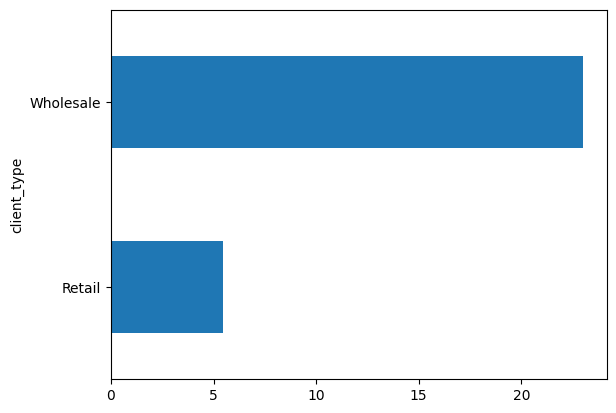

In [27]:
import matplotlib.pyplot as plt

avg_units_client_type = df.groupby('client_type')['quantity'].mean()
avg_units_client_type.plot(kind='barh')
plt.show()

# Reporting on sales data

Now let's now move on to the competition and challenge.

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [28]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

## ⌛️ Time is ticking. Good luck!

In [29]:
df.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


In [30]:
#What are the total sales for each payment method?
#First let's see the available payment methods.

df.payment.unique()

array(['Credit card', 'Cash', 'Transfer'], dtype=object)

In [31]:
#What are the total sales for each payment method?
Sales_by_payment = df.groupby('payment')[['total']].sum()
Sales_by_payment

,total
payment,
Cash,19199.10
Credit card,110271.57
Transfer,159642.33


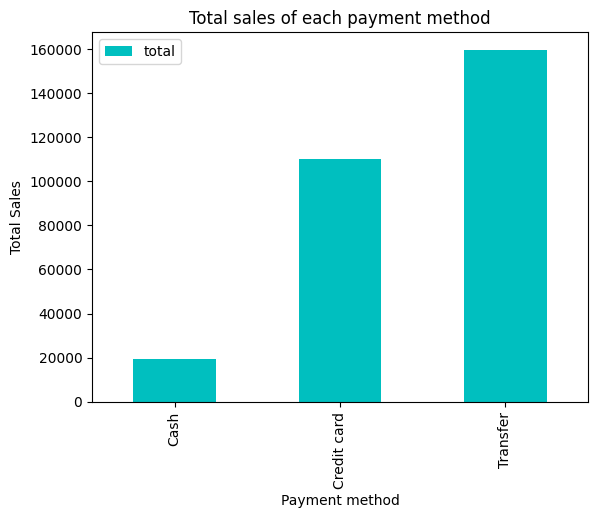

In [32]:
#Trying to visualize the findings above

Sales_by_payment.plot(kind='bar', color = 'c')
plt.xlabel("Payment method")
plt.ylabel("Total Sales")
plt.title("Total sales of each payment method")
plt.show()


In [33]:
#countries_reviewed = review.groupby(['country', 'province']).variety.agg([len])
#countries_reviewed

In [34]:
#What is the average unit price for each product line?
avg_unit_price_product = df.groupby('product_line')['unit_price'].mean()
avg_unit_price_product



product_line
Breaking system          17.740522
Electrical system        25.585130
Engine                   60.091803
Frame & body             42.832229
Miscellaneous            22.810738
Suspension & traction    33.969868
Name: unit_price, dtype: float64

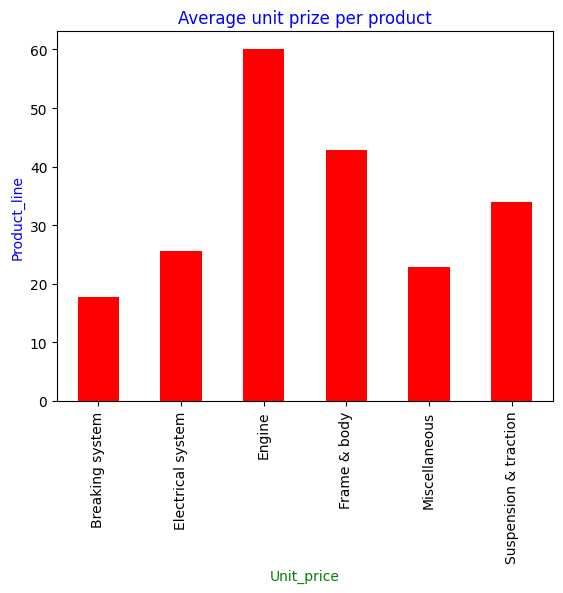

In [35]:
#Visualizing the above
avg_unit_price_product.plot(kind = 'bar', color = 'r')
plt.xlabel('Unit_price', color = 'g')
plt.ylabel('Product_line', color = 'b')
plt.title('Average unit prize per product', color = 'b')
plt.show()




In [36]:
#From the plot above, the product line 'engine' had the highest average unit price. But then we want to find out if 'engine' was the most product sold. Let us see below.

In [37]:
total_unit_price_product = df.groupby('product_line')['unit_price'].sum().sort_values()
total_unit_price_product

product_line
Miscellaneous            2782.91
Engine                   3665.60
Breaking system          4080.32
Electrical system        4937.93
Frame & body             7110.15
Suspension & traction    7745.13
Name: unit_price, dtype: float64

In [38]:
count_unit_price_product = df.groupby('product_line')['unit_price'].count().sort_values()
count_unit_price_product

product_line
Engine                    61
Miscellaneous            122
Frame & body             166
Electrical system        193
Suspension & traction    228
Breaking system          230
Name: unit_price, dtype: int64

[Text(0, 0, 'Miscellaneous'),
 Text(1, 0, 'Breaking system'),
 Text(2, 0, 'Suspension & traction'),
 Text(3, 0, 'Frame & body'),
 Text(4, 0, 'Engine'),
 Text(5, 0, 'Electrical system')]

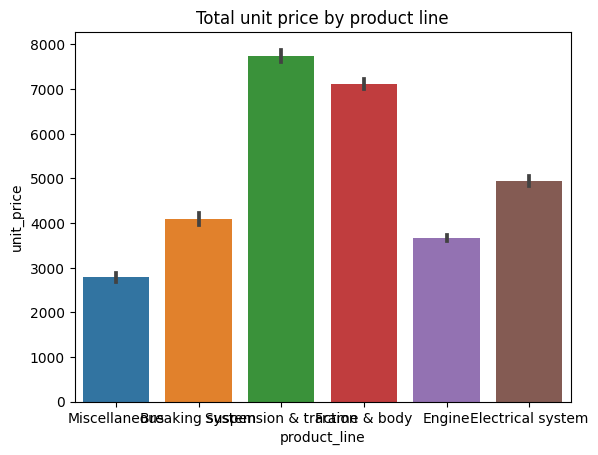

In [39]:
p = sns.barplot(x = 'product_line', y = 'unit_price', data = df, estimator = np.sum)
p.set(title = 'Total unit price by product line')
p.set_xticklabels(p.get_xticklabels())

[Text(0.5, 1.0, ' unit price for Engine')]

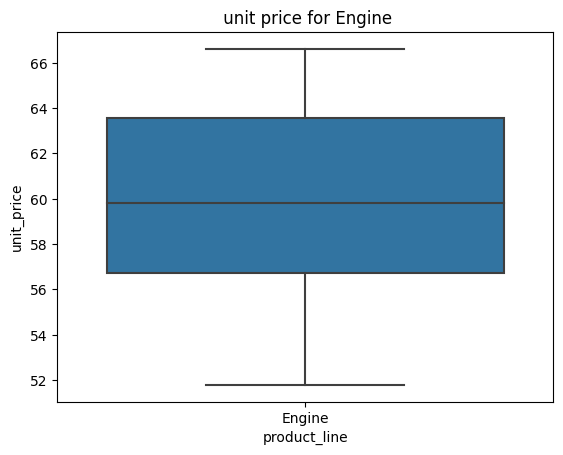

In [40]:
productline = 'Engine'
df_product_line = df[df.product_line == productline]
p = sns.boxplot(x = 'product_line', y = 'unit_price', data = df_product_line)
p.set(title = f' unit price for {productline}')

From the last two plots above, we see that suspension and traction had the highest unit price total, while engine had highet average unit price. This means that even though engine is the most expensive item in the list, it was not the most sold. we can confirm that by checking the quantity.

In [50]:
product_quantity = df.groupby('product_line')['quantity'].count()
product_quantity

product_line
Breaking system          230
Electrical system        193
Engine                    61
Frame & body             166
Miscellaneous            122
Suspension & traction    228
Name: quantity, dtype: int64

In [ ]:
#[Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product #line, etc.)

In [51]:
#Average purchase value by client type
ave_purch_by_client = df.groupby('client_type')['total'].mean().sort_values()
ave_purch_by_client

client_type
Retail       167.058929
Wholesale    709.521467
Name: total, dtype: float64

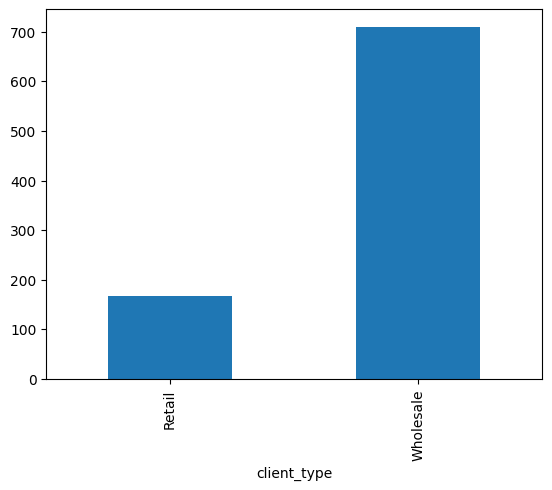

In [52]:
#visualizing the above
ave_purch_by_client.plot(kind = 'bar');

In [65]:
Totalpur_clienttype = df.groupby(['warehouse', 'client_type'])['quantity'].sum()
Totalpur_clienttype

warehouse  client_type
Central    Retail         2039
           Wholesale      2488
North      Retail         1394
           Wholesale      1860
West       Retail          782
           Wholesale       832
Name: quantity, dtype: int64

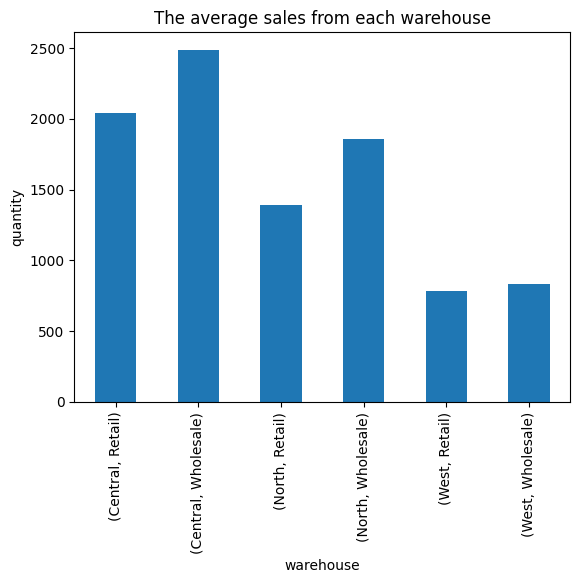

In [66]:
Totalpur_clienttype.plot(kind='bar')
plt.xlabel("warehouse")
plt.ylabel("quantity")
plt.title("The average sales from each warehouse")
plt.show()

#### Summary 
Most customers who shoped from the store paid with their cards, and the most sold item from the stock is 'suspension and traction', while the least sold is 'engine'. The central warehouse recorded the highest sales in terms of the number of items sold, and the client who did the highest purchase were wholesalers. 